Objectif approximer la fonction f:x->2*cos(x)+4 sur [0,10]
grâce à un percpetron multicouche(soit un réseaux de neuronnes)




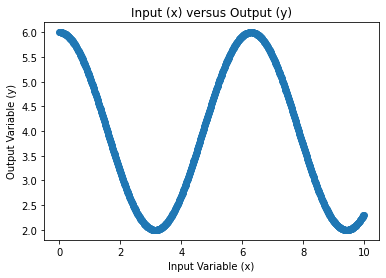

In [4]:
# example of creating a univariate dataset with a given mapping function
from matplotlib import pyplot
from numpy import cos
# define the input data
x = [i/100 for i in range(0,1000)]
# define the output data
y = [2.0*cos(i)+4 for i in x]
# plot the input versus the output
pyplot.scatter(x,y)
pyplot.title('Input (x) versus Output (y)')
pyplot.xlabel('Input Variable (x)')
pyplot.ylabel('Output Variable (y)')
pyplot.show()

La fonction à approximer correpsond donc à un signal sinusoïdale qu'il faudra discrétiser afin de permettre la prédiction via le réseaux de neuronnes.
L'étude du signal par un réseaux de neuronnes nécessite le formatage de notre data set x vecteurs des données en entrée et y vecteurs des données attendues en résultats afin de pouvoir calculer l'erreur d'approximation faite par le réseaux.

In [7]:
# define the dataset
import numpy as np
x = np.asarray([i/100 for i in range(0,1001)])
y = np.asarray([2.0*cos(i)+4 for i in x])
print(x.min(), x.max(), y.min(), y.max())

0.0 10.0 2.0000025365449208 6.0


Les données x et y sont reformatés sous forme de vecteurs afin d'être adapté aux algorithme d'apprentissage automatique sous python

In [23]:
import sklearn.preprocessing

x = x.reshape((len(x), 1))
y = y.reshape((len(y), 1))


# separately scale the input and output variables
scale_x = sklearn.preprocessing.MinMaxScaler()
x = scale_x.fit_transform(x)
scale_y = sklearn.preprocessing.MinMaxScaler()
y = scale_y.fit_transform(y)
print(x.min(), x.max(), y.min(), y.max())

0.0 1.0 0.0 1.0
[[0.   ]
 [0.001]
 [0.002]
 ...
 [0.998]
 [0.999]
 [1.   ]]
[[1.        ]
 [0.999975  ]
 [0.9999    ]
 ...
 [0.0751077 ]
 [0.07776457]
 [0.08046365]]


Normalisation des data input et output pour faciliter la prédiction par le réseaux de neurones

Initailisation du réseaux de neuronnes vides puis ajout des 'couches cachées' 

In [0]:
import keras
from keras.layers import Dense, Activation
# design the neural network model
##initialisation du réseaux de neuronnes vides
model = keras.Sequential()
#première couche cachée avec 10 noeuds
model.add(Dense(10, input_dim=1, activation='relu', kernel_initializer='he_uniform'))
#ajout deuxièle couche cachée avec 10 noeuds
model.add(Dense(10, activation='relu', kernel_initializer='he_uniform'))
#ajout couche de sortie
model.add(Dense(1))

On va adapter le modèle du signal en se basant sur une erreur d'approximation MSE soit l'erreure quadratique moyenne entre les valeurs de sorties attendues et les prédections calculées par le réseaux de neuronnes. De plus on optimise le modèle grâce à l'optimizer 'adam' disponible dans la librairie keras. Cet optimizer permet d'effectuer un gradiant descendant qui permet de diminuer l'erreur d'approximation donc d'optimiser le modèle.

In [39]:
# define the loss function and optimization algorithm
model.compile(loss='mse', optimizer='adam')


# fit the model on the training dataset
model.fit(x, y, epochs=500, batch_size=10, verbose=0)

In [40]:
# make predictions for the input data
yhat = model.predict(x)
print(yhat)

[[0.99649906]
 [0.99649   ]
 [0.9964808 ]
 ...
 [0.02215143]
 [0.02221612]
 [0.02228073]]


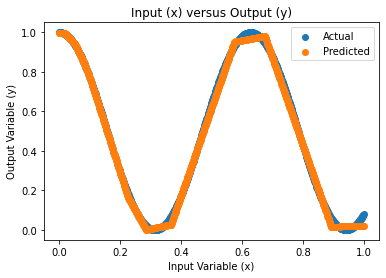

In [41]:
# inverse transforms
x_plot = scale_x.inverse_transform(x)
y_plot = scale_y.inverse_transform(y)
yhat_plot = scale_y.inverse_transform(yhat)




pyplot.scatter(x_plot,y_plot, label='Actual')
# plot x vs yhat
pyplot.scatter(x_plot,yhat_plot, label='Predicted')
# plot x vs yhat
pyplot.title('Input (x) versus Output (y)')
pyplot.xlabel('Input Variable (x)')
pyplot.ylabel('Output Variable (y)')
pyplot.legend()
pyplot.show()